#Genetic Algorithm implementation on stock data
The NeuroEvolution class you provided is a type of genetic algorithm called Neuroevolution of Augmenting Topologies (NEAT). NEAT is a genetic algorithm that is used to evolve artificial neural networks. It is a non-parametric algorithm, which means that it does not require any prior knowledge of the problem being solved. NEAT is a population-based algorithm, which means that it maintains a population of neural networks and evolves them over time. NEAT uses genetic operators such as crossover and mutation to create new neural networks from existing neural networks. NEAT has been shown to be effective at solving a variety of problems, including robotics, game playing, and image recognition.

Here is a breakdown of the different genetic operators used in the NeuroEvolution class:
- Mutation: Mutation is a genetic operator that introduces random changes to a neural network. This can help to prevent the population from becoming too similar and can help to improve the performance of the neural networks.
- Crossover: Crossover is a genetic operator that combines two neural networks to create a new neural network. This can help to transfer good genes from one neural network to another and can help to improve the performance of the new neural network.
- Selection: Selection is a process by which the best neural networks in the population are chosen to reproduce. This helps to ensure that the population of neural networks continues to improve over time.

The NeuroEvolution class uses a combination of mutation, crossover, and selection to evolve a population of neural networks. This process is repeated over a number of generations until a neural network with the desired performance is found.

##Types of GA
There are many different types of genetic algorithms (GAs) that can be used in deep learning. Some of the most common types include:
- Neuroevolution of Augmenting Topologies (NEAT): NEAT is a GA that is specifically designed for evolving neural networks. It is a population-based algorithm that uses genetic operators such as crossover and mutation to create new neural networks. NEAT has been shown to be effective at solving a variety of problems, including robotics, game playing, and image recognition.
- Genetic Programming (GP): GP is a GA that can be used to evolve programs. It is a population-based algorithm that uses genetic operators such as crossover and mutation to create new programs. GP has been shown to be effective at solving a variety of problems, including natural language processing and robotics.
- Genetic Algorithm for Neural Architecture Search (NAS): NAS is a GA that is specifically designed for searching for the best neural network architecture for a given problem. It is a population-based algorithm that uses genetic operators such as crossover and mutation to create new neural network architectures. NAS has been shown to be effective at finding neural network architectures that outperform those designed by human experts.


## GA+Signals

In [ ]:
import numpy as np
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time
import datetime as dt
from datetime import date, datetime, timedelta
from pandas_datareader import data as web
import yfinance as yf

In [ ]:
trading_period = 365
Stock = 'AAPL'

In [ ]:
yf.pdr_override()
start_date = dt.datetime(2019,1,1)
end_date = dt.datetime(2020,1,1)
df = web.get_data_yahoo(Stock, start_date, end_date)
X_train = df.dropna()
#X_train = X_train.divide(X_train.iloc[0] )
file_name_train = 'dataset/'+Stock+'_train.csv'
display(file_name_train)
X_train.to_csv(file_name_train, sep=',', encoding='utf-8')
print(X_train.head())

[*********************100%***********************]  1 of 1 completed


'dataset/AAPL_train.csv'

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-01-02  38.722500  39.712502  38.557499  39.480000  37.994492  148158800
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.209969  365248800
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.670357  234428400
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.590969  219111200
2019-01-08  37.389999  37.955002  37.130001  37.687500  36.269451  164101200


In [ ]:
yf.pdr_override()
start_date = dt.datetime(2020,2,1)
end_date = dt.datetime(2021,1,1)
df = web.get_data_yahoo(Stock, start_date, end_date)
X_test = df.dropna()
file_name_test = 'dataset/'+Stock+'_test.csv'
display(file_name_test)
X_test.to_csv(file_name_test, sep=',', encoding='utf-8')

print(X_test.head())

[*********************100%***********************]  1 of 1 completed


'dataset/AAPL_test.csv'

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-02-03  76.074997  78.372498  75.555000  77.165001  75.377312  173788400
2020-02-04  78.827499  79.910004  78.407501  79.712502  77.865799  136616400
2020-02-05  80.879997  81.190002  79.737503  80.362503  78.500740  118826800
2020-02-06  80.642502  81.305000  80.065002  81.302498  79.418938  105425600
2020-02-07  80.592499  80.849998  79.500000  80.007500  78.339439  117684000


In [ ]:
df = pd.read_csv('dataset/AAPL_train.csv')
df = df.drop('Date',axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,38.722500,39.712502,38.557499,39.480000,37.994492,148158800
1,35.994999,36.430000,35.500000,35.547501,34.209969,365248800
2,36.132500,37.137501,35.950001,37.064999,35.670357,234428400
3,37.174999,37.207500,36.474998,36.982498,35.590969,219111200
4,37.389999,37.955002,37.130001,37.687500,36.269451,164101200


##Signal Strategy
The calculate_signal function takes a DataFrame of stock data as input and returns a DataFrame of signals. The signals indicate whether to buy or sell the stock, based on a moving average crossover strategy. The function first calculates the short-term and long-term moving averages of the closing price. It then compares the two moving averages and generates a signal to buy when the short-term moving average crosses above the long-term moving average. The function returns a DataFrame of positions, which indicates whether to buy or sell the stock on each day.

In [ ]:
def calculate_signal(df):
    short_window = int(0.025 * len(df))
    long_window = int(0.05 * len(df))

    signals = pd.DataFrame(index=df.index)
    signals['signal'] = 0.0

    signals['short_ma'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
    signals['long_ma'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    signals['signal'][short_window:] = np.where(signals['short_ma'][short_window:] > signals['long_ma'][short_window:], 1.0, 0.0)   
    signals['positions'] = signals['signal'].diff()

    #signals
    position=signals['positions']
    
    return position

In [ ]:
close = df.Close.values.tolist()
initial_money = 20000
window_size = 30
skip = 1

In [ ]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.id = id_

def relu(X):
        return np.maximum(X, 0)
        
def softmax(X):
        e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
        a1 = np.dot(X, nets.W1)
        z1 = relu(a1)
        a2 = np.dot(z1, nets.W2)
        return softmax(a2)

In [ ]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        
    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))
    
    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual
    
    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child
    
    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]
    
    def buy(self, individual, trends):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []
        
        for t in range(0, len(trends) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= trends[t] and position[t]==1:
                inventory.append(trends[t])
                initial_money -= trends[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, trends[t], initial_money))
            
            elif action == 2 and len(inventory) and position[t]==-1 :
                bought_price = inventory.pop(0)
                initial_money += trends[t]
                states_sell.append(t)
                try:
                    invest = ((trends[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, trends[t], invest, initial_money)
                )
            state = next_state
        
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []
            
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)
            
                if action == 1 and starting_money >= self.trend[t] and position[t]==1:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]

                elif action == 2 and len(inventory) and position[t]==-1 :
                    bought_price = inventory.pop(0)
                    starting_money += self.trend[t]

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest
    
    def evolve(self, generations=20, checkpoint= 5):
        start=time.time()
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            fitnesses = [i.fitness for i in self.population]
            sort_fitness = np.argsort(fitnesses)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0], 
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
        end=time.time()
        print("Time :")
        print(end-start)
        return fittest_individual

In [ ]:
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)
position=calculate_signal(df)

In [ ]:
fittest_nets = neural_evolve.evolve(50)

epoch 5, fittest individual 0 with accuracy 0.212725
epoch 10, fittest individual 0 with accuracy 0.212725
epoch 15, fittest individual 0 with accuracy 0.212725
epoch 20, fittest individual 0 with accuracy 0.214150
epoch 25, fittest individual 0 with accuracy 0.214150
epoch 30, fittest individual 0 with accuracy 0.222013
epoch 35, fittest individual 43 with accuracy 0.312825
epoch 40, fittest individual 0 with accuracy 0.312825
epoch 45, fittest individual 0 with accuracy 0.331438
epoch 50, fittest individual 0 with accuracy 0.331438
Time :
66.79148483276367


In [ ]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets,close)

day 7: buy 1 unit at price 38.072498, total balance 19961.927502
day 35: buy 1 unit at price 43.242500, total balance 19918.685001
day 89, sell 1 unit at price 49.294998, investment 29.476657 %, total balance 19967.980000,
day 108: buy 1 unit at price 47.537498, total balance 19920.442501
day 156: buy 1 unit at price 50.435001, total balance 19870.007500
day 166, sell 1 unit at price 52.252499, investment 20.835979 %, total balance 19922.259998,
day 170: buy 1 unit at price 53.320000, total balance 19868.939999
day 184, sell 1 unit at price 55.257500, investment 16.239814 %, total balance 19924.197498,
day 188: buy 1 unit at price 56.147499, total balance 19868.049999
day 228, sell 1 unit at price 66.072502, investment 31.005255 %, total balance 19934.122501,
day 233, sell 1 unit at price 65.434998, investment 22.721301 %, total balance 19999.557499,
day 236, sell 1 unit at price 66.730003, investment 18.847686 %, total balance 20066.287502,


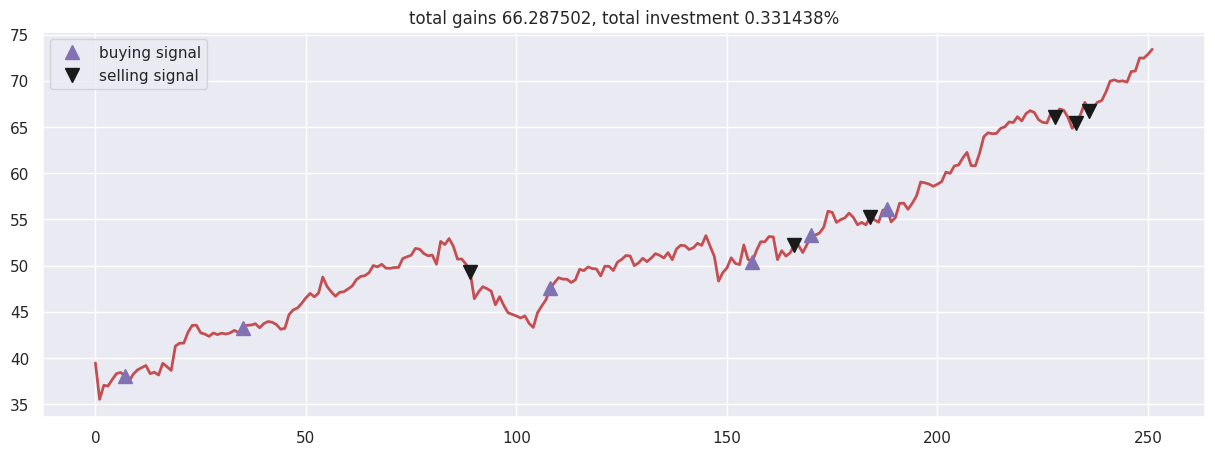

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('/content/dataset/AAPL_test.csv')
df = df.drop("Date",axis=1)
df = df.iloc[:251]
print(df)

           Open        High         Low       Close   Adj Close     Volume
0     76.074997   78.372498   75.555000   77.165001   75.377312  173788400
1     78.827499   79.910004   78.407501   79.712502   77.865799  136616400
2     80.879997   81.190002   79.737503   80.362503   78.500740  118826800
3     80.642502   81.305000   80.065002   81.302498   79.418938  105425600
4     80.592499   80.849998   79.500000   80.007500   78.339439  117684000
..          ...         ...         ...         ...         ...        ...
227  131.320007  133.460007  131.100006  131.970001  130.025925   54930100
228  133.990005  137.339996  133.509995  136.690002  134.676407  124486200
229  138.050003  138.789993  134.339996  134.869995  132.883194  121047300
230  135.580002  135.990005  133.399994  133.720001  131.750137   96452100
231  134.080002  134.740005  131.720001  132.690002  130.735336   99116600

[232 rows x 6 columns]


In [ ]:
close2 = df.Close.values.tolist()
position=calculate_signal(df)

In [ ]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets,close2)

day 5: buy 1 unit at price 80.387497, total balance 19919.612503
day 13, sell 1 unit at price 78.262497, investment -2.643446 %, total balance 19997.875000,
day 23: buy 1 unit at price 72.257500, total balance 19925.617500
day 26, sell 1 unit at price 68.857498, investment -4.705396 %, total balance 19994.474998,
day 125: buy 1 unit at price 106.260002, total balance 19888.214996
day 151, sell 1 unit at price 112.820000, investment 6.173534 %, total balance 20001.034996,


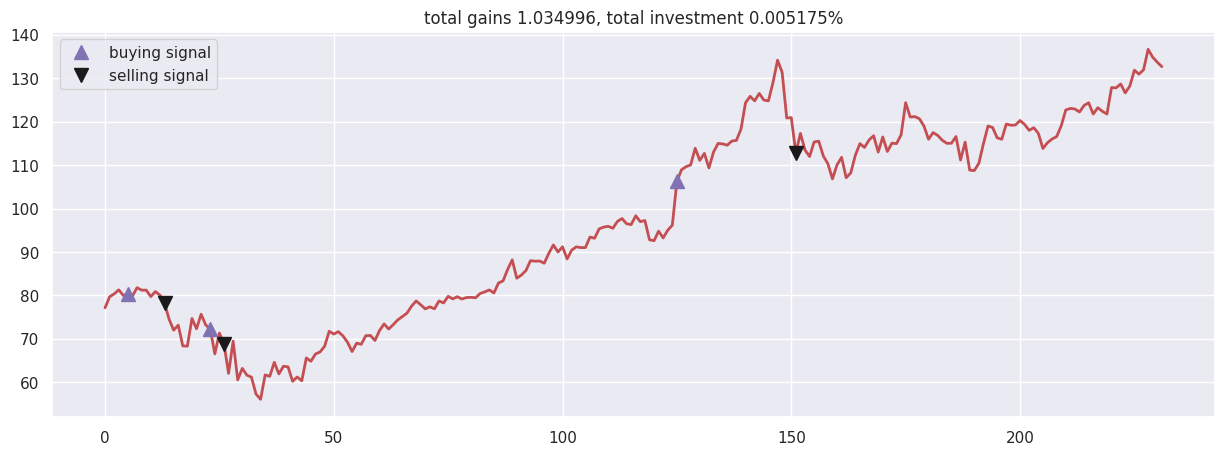

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close2, color='r', lw=2.)
plt.plot(close2, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close2, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

##GA

In [ ]:
df = pd.read_csv('/content/dataset/AAPL_train.csv')
df.shape

(252, 7)

In [ ]:
df = df.drop("Date",axis=1)

In [ ]:
close = df.Close.values.tolist()
initial_money = 20000
window_size = 30
skip = 1

In [ ]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.id = id_

def relu(X):
    return np.maximum(X, 0)
    
def softmax(X):
    e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
    a1 = np.dot(X, nets.W1)
    z1 = relu(a1)
    a2 = np.dot(z1, nets.W2)
    return softmax(a2)

In [ ]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money
        
    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))
    
    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual
    
    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child
    
    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])
    
    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]
    
    def buy(self, individual, trends):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []
        
        for t in range(0, len(trends) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and starting_money >= trends[t]:
                inventory.append(trends[t])
                initial_money -= trends[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, trends[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += trends[t]
                states_sell.append(t)
                try:
                    invest = ((trends[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, trends[t], invest, initial_money)
                )
            state = next_state
        
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []
            
            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)
            
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]

                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    starting_money += self.trend[t]

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest
        
    
    def evolve(self, generations=20, checkpoint= 5):
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            fitnesses = [i.fitness for i in self.population]
            sort_fitness = np.argsort(fitnesses)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0], 
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
        return fittest_individual

In [ ]:
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)

In [ ]:
fittest_nets = neural_evolve.evolve(50)

epoch 5, fittest individual 0 with accuracy 0.754987
epoch 10, fittest individual 0 with accuracy 1.001737
epoch 15, fittest individual 0 with accuracy 1.001737
epoch 20, fittest individual 43 with accuracy 1.116812
epoch 25, fittest individual 0 with accuracy 1.116812
epoch 30, fittest individual 0 with accuracy 1.116812
epoch 35, fittest individual 0 with accuracy 1.690725
epoch 40, fittest individual 0 with accuracy 1.690725
epoch 45, fittest individual 0 with accuracy 1.690725
epoch 50, fittest individual 0 with accuracy 1.695500


In [ ]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets,close)

day 1: buy 1 unit at price 35.547501, total balance 19964.452499
day 2, sell 1 unit at price 37.064999, investment 4.268930 %, total balance 20001.517498,
day 3: buy 1 unit at price 36.982498, total balance 19964.535000
day 4: buy 1 unit at price 37.687500, total balance 19926.847500
day 5: buy 1 unit at price 38.327499, total balance 19888.520000
day 6, sell 1 unit at price 38.450001, investment 3.968100 %, total balance 19926.970001,
day 7, sell 1 unit at price 38.072498, investment 1.021554 %, total balance 19965.042500,
day 8, sell 1 unit at price 37.500000, investment -2.159023 %, total balance 20002.542500,
day 9: buy 1 unit at price 38.267502, total balance 19964.274998
day 10, sell 1 unit at price 38.735001, investment 1.221660 %, total balance 20003.009998,
day 11: buy 1 unit at price 38.965000, total balance 19964.044998
day 12: buy 1 unit at price 39.205002, total balance 19924.839996
day 13: buy 1 unit at price 38.325001, total balance 19886.514996
day 14, sell 1 unit at pr

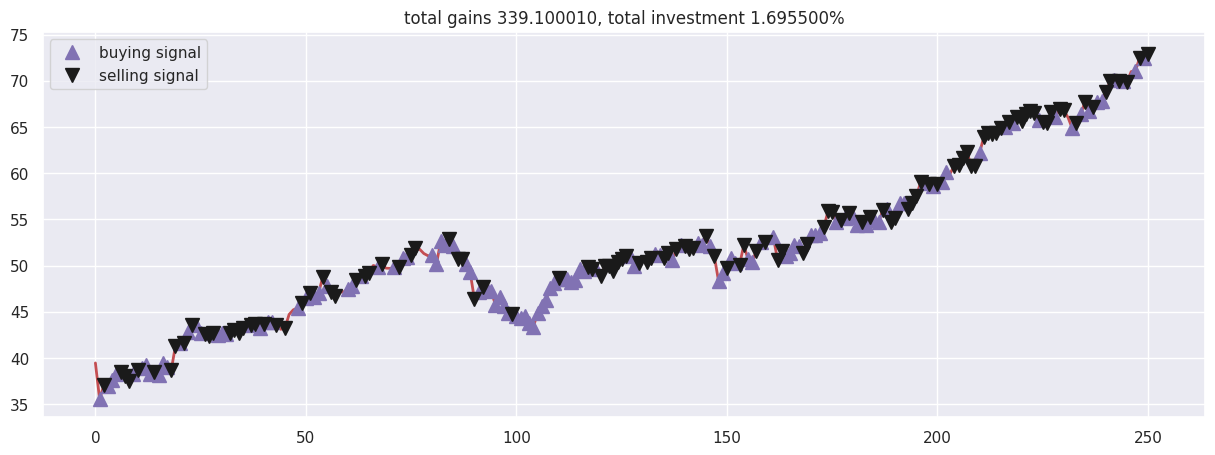

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv('/content/dataset/AAPL_test.csv')
df = df.drop("Date",axis=1)
df = df.iloc[:251]
print(len(df))
close2 = df.Close.values.tolist()

232


In [ ]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets,close2)

day 1: buy 1 unit at price 79.712502, total balance 19920.287498
day 2, sell 1 unit at price 80.362503, investment 0.815432 %, total balance 20000.650002,
day 3: buy 1 unit at price 81.302498, total balance 19919.347504
day 4: buy 1 unit at price 80.007500, total balance 19839.340004
day 5: buy 1 unit at price 80.387497, total balance 19758.952507
day 6, sell 1 unit at price 79.902496, investment -1.721966 %, total balance 19838.855003,
day 7, sell 1 unit at price 81.800003, investment 2.240419 %, total balance 19920.655006,
day 8, sell 1 unit at price 81.217499, investment 1.032501 %, total balance 20001.872505,
day 9: buy 1 unit at price 81.237503, total balance 19920.635002
day 10, sell 1 unit at price 79.750000, investment -1.831055 %, total balance 20000.385002,
day 11: buy 1 unit at price 80.904999, total balance 19919.480003
day 12: buy 1 unit at price 80.074997, total balance 19839.405006
day 13: buy 1 unit at price 78.262497, total balance 19761.142509
day 14, sell 1 unit at p

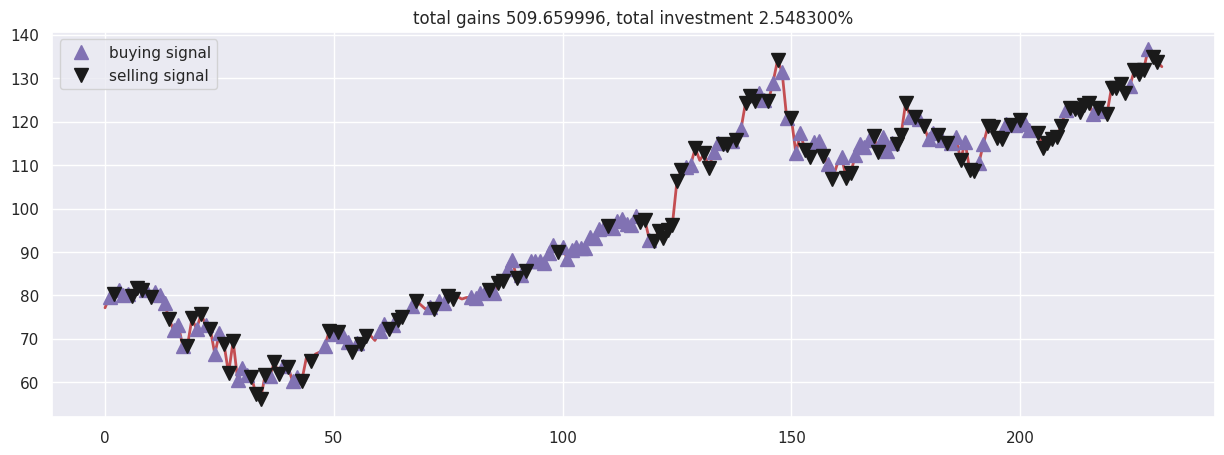

In [ ]:
fig = plt.figure(figsize = (15,5))
plt.plot(close2, color='r', lw=2.)
plt.plot(close2, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close2, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()